In [433]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [434]:
df = pd.read_csv("/Users/ritikkesari/Downloads/Housing.csv")

df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [435]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [436]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [437]:
df.dropna(inplace = True)

In [438]:
df.count()

price               545
area                545
bedrooms            545
bathrooms           545
stories             545
mainroad            545
guestroom           545
basement            545
hotwaterheating     545
airconditioning     545
parking             545
prefarea            545
furnishingstatus    545
dtype: int64

In [439]:
X = df.drop(["price"],axis = 1)

In [440]:
y = df["price"]

In [441]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size = 0.2)

In [442]:
train_data = X_train.join(y_train)

In [443]:
train_data

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,price
539,2990,2,1,1,no,no,no,no,no,1,no,unfurnished,1855000
537,1700,3,1,2,yes,no,no,no,no,0,no,unfurnished,1890000
128,5500,3,1,3,yes,yes,no,no,yes,1,no,furnished,5873000
84,3760,3,1,2,yes,no,no,yes,no,2,no,semi-furnished,6510000
441,4370,3,1,2,yes,no,no,no,no,0,no,unfurnished,3220000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
399,7350,2,1,1,yes,no,no,no,no,1,no,semi-furnished,3500000
26,6000,3,2,4,yes,yes,yes,no,yes,0,yes,semi-furnished,8463000
366,3630,2,1,1,yes,no,yes,no,no,0,no,furnished,3675000
431,3180,4,1,2,yes,no,yes,no,yes,0,no,unfurnished,3290000


array([[<AxesSubplot:title={'center':'area'}>,
        <AxesSubplot:title={'center':'bedrooms'}>],
       [<AxesSubplot:title={'center':'bathrooms'}>,
        <AxesSubplot:title={'center':'stories'}>],
       [<AxesSubplot:title={'center':'parking'}>,
        <AxesSubplot:title={'center':'price'}>]], dtype=object)

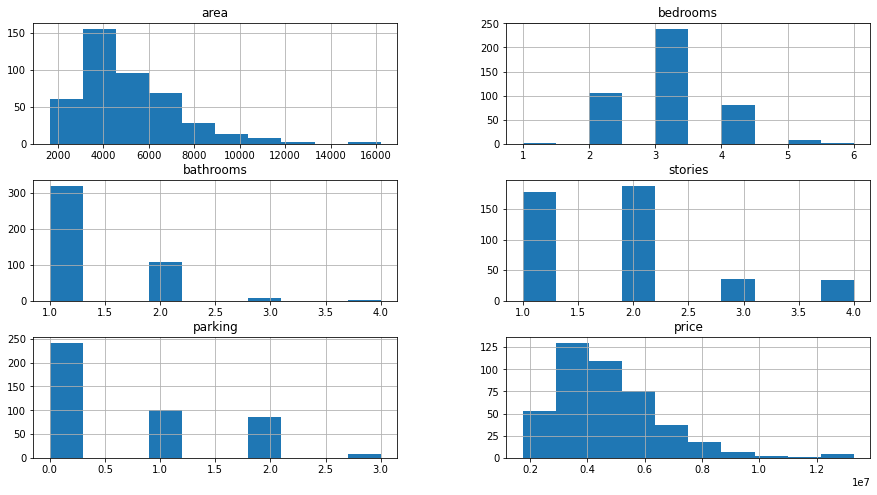

In [444]:
train_data.hist(figsize = (15,8))

<AxesSubplot:>

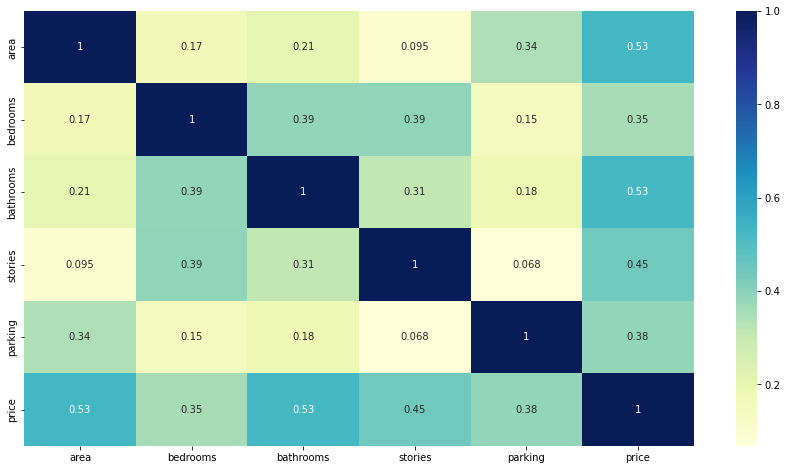

In [445]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(), annot = True, cmap = "YlGnBu")

In [446]:
train_data['bedrooms'] = np.log(train_data['bedrooms']+1)
train_data['bathrooms'] = np.log(train_data['bedrooms']+1)
train_data['stories'] = np.log(train_data['bedrooms']+1)
train_data['parking'] = np.log(train_data['bedrooms']+1)


array([[<AxesSubplot:title={'center':'area'}>,
        <AxesSubplot:title={'center':'bedrooms'}>],
       [<AxesSubplot:title={'center':'bathrooms'}>,
        <AxesSubplot:title={'center':'stories'}>],
       [<AxesSubplot:title={'center':'parking'}>,
        <AxesSubplot:title={'center':'price'}>]], dtype=object)

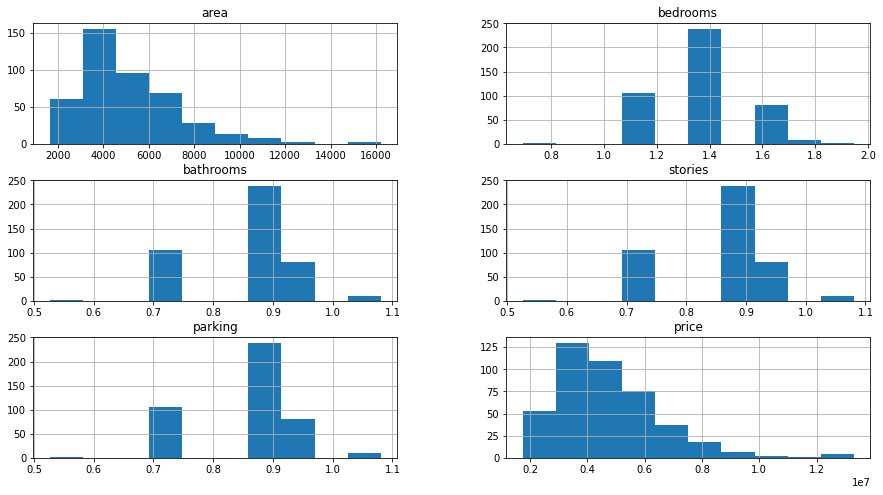

In [447]:
train_data.hist(figsize = (15,8))

In [448]:
train_data = train_data.join(pd.get_dummies(train_data.furnishingstatus)).drop(["furnishingstatus"], axis = 1)

In [449]:
mapping = {'yes': 1, 'no': 0}

In [450]:
train_data["mainroad_new"] = train_data["mainroad"].map(mapping)

train_data.drop(["mainroad"], axis = 1, inplace = True)

train_data

,area,bedrooms,bathrooms,stories,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,price,furnished,semi-furnished,unfurnished,mainroad_new
539,2990,1.098612,0.741276,0.741276,no,no,no,no,0.741276,no,1855000,0,0,1,0
537,1700,1.386294,0.869742,0.869742,no,no,no,no,0.869742,no,1890000,0,0,1,1
128,5500,1.386294,0.869742,0.869742,yes,no,no,yes,0.869742,no,5873000,1,0,0,1
84,3760,1.386294,0.869742,0.869742,no,no,yes,no,0.869742,no,6510000,0,1,0,1
441,4370,1.386294,0.869742,0.869742,no,no,no,no,0.869742,no,3220000,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399,7350,1.098612,0.741276,0.741276,no,no,no,no,0.741276,no,3500000,0,1,0,1
26,6000,1.386294,0.869742,0.869742,yes,yes,no,yes,0.869742,yes,8463000,0,1,0,1
366,3630,1.098612,0.741276,0.741276,no,yes,no,no,0.741276,no,3675000,1,0,0,1
431,3180,1.609438,0.959135,0.959135,no,yes,no,yes,0.959135,no,3290000,0,0,1,1


<AxesSubplot:>

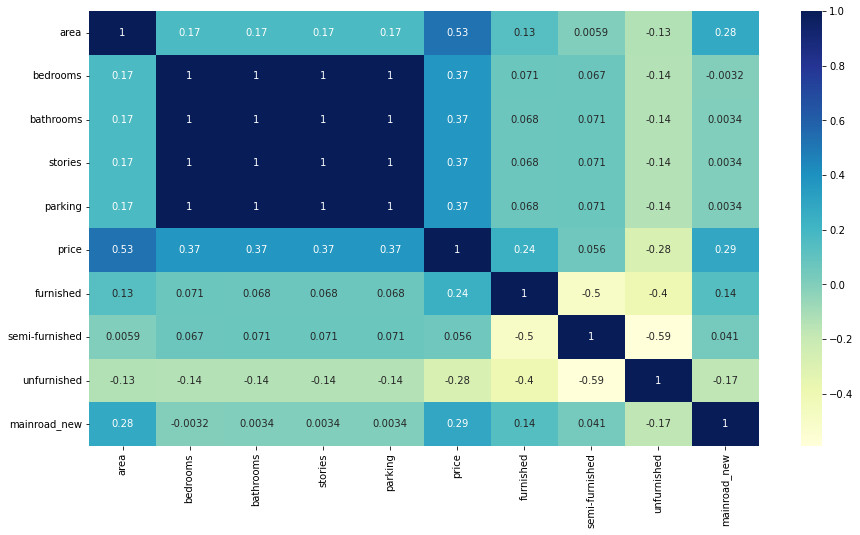

In [451]:
plt.figure(figsize =(15,8))
sns.heatmap(train_data.corr(),annot = True, cmap = "YlGnBu")

In [452]:
X_train = train_data.drop(["price","airconditioning","hotwaterheating","guestroom","prefarea",'basement'],axis = 1)
y_train = train_data["price"]

X_train

,area,bedrooms,bathrooms,stories,parking,furnished,semi-furnished,unfurnished,mainroad_new
539,2990,1.098612,0.741276,0.741276,0.741276,0,0,1,0
537,1700,1.386294,0.869742,0.869742,0.869742,0,0,1,1
128,5500,1.386294,0.869742,0.869742,0.869742,1,0,0,1
84,3760,1.386294,0.869742,0.869742,0.869742,0,1,0,1
441,4370,1.386294,0.869742,0.869742,0.869742,0,0,1,1
...,...,...,...,...,...,...,...,...,...
399,7350,1.098612,0.741276,0.741276,0.741276,0,1,0,1
26,6000,1.386294,0.869742,0.869742,0.869742,0,1,0,1
366,3630,1.098612,0.741276,0.741276,0.741276,1,0,0,1
431,3180,1.609438,0.959135,0.959135,0.959135,0,0,1,1


In [453]:
y_train

539    1855000
537    1890000
128    5873000
84     6510000
441    3220000
        ...   
399    3500000
26     8463000
366    3675000
431    3290000
93     6300000
Name: price, Length: 436, dtype: int64

In [454]:

model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [455]:
test_data = X_test.join(y_test)

test_data['bedrooms'] = np.log(test_data['bedrooms']+1)
test_data['bathrooms'] = np.log(test_data['bedrooms']+1)
test_data['stories'] = np.log(test_data['bedrooms']+1)
test_data['parking'] = np.log(test_data['bedrooms']+1)

test_data = test_data.join(pd.get_dummies(test_data.furnishingstatus)).drop(["furnishingstatus"], axis = 1)

mapping = {'yes': 1, 'no': 0}


test_data["mainroad_new"] = test_data["mainroad"].map(mapping)

test_data.drop(["mainroad"], axis = 1, inplace = True)

X_test = test_data.drop(["price","airconditioning","hotwaterheating","guestroom","prefarea",'basement'],axis = 1)

y_test = test_data["price"]

In [456]:
y_pred = model.predict(X_test)

/Applications/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Applications/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


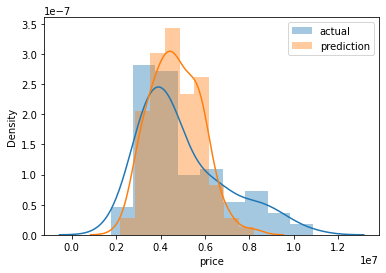

In [457]:
sns.distplot(y_test,label = "actual")
sns.distplot(y_pred,label = "prediction")
plt.legend()

In [458]:
mse = mean_squared_error(y_test,y_pred)
print(mse)

2018200476444.608


In [459]:
rmse = np.sqrt(mse)
print(rmse)

1420633.8291215678


In [460]:
r2 = r2_score(y_test,y_pred)
print(r2)

0.4699707248705849
